In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nf
from netCDF4 import Dataset
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from scipy.integrate import dblquad

In [8]:
path='/media/saranya/DAEA17D6EA17ADAF/Data/Research_2022/jun22/new_ready/'
out="/media/saranya/DAEA17D6EA17ADAF/Data/Research_2022/jun22/time_series/"
p1='/media/saranya/DAEA17D6EA17ADAF/Data/Research_2022/jun22/'

In [4]:
dm0=xr.open_dataset(path+'w10_amphan.nc')

In [5]:
dm0

<xarray.Dataset>
Dimensions:  (time: 51, lon: 600, lat: 320)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 ... 2020-05-20T06:00:00
  * lon      (lon) float64 30.0 30.25 30.5 30.75 ... 179.0 179.2 179.5 179.8
  * lat      (lat) float64 -19.75 -19.5 -19.25 -19.0 ... 59.25 59.5 59.75 60.0
Data variables:
    ws10     (time, lat, lon) float32 ...

In [16]:
ws=dm0.ws10
ws_nan=ws.where(ws>7, other='nan')

In [25]:
#nio tracks use latitude longitude instead of lat lon
track=pd.read_csv(p1+'nio/nio_20200514.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(51, 2)

In [26]:
tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-4
tc_irad[:,1] = pos[:,0]+4
tc_irad[:,2] = pos[:,1]-4
tc_irad[:,3] = pos[:,1]+4

In [27]:
dw10m=np.zeros((pos.shape[0],32,32))
ws=np.zeros((tc_irad.shape[0],))
dw10n=np.zeros((pos.shape[0],32,32))
wsn=np.zeros((tc_irad.shape[0],))

In [28]:
for it in range(tc_irad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    #test.append(dm.slp[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw)))
    dw10m[it,:,:]=dm0.ws10[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw))[0:32,0:32]
    ws[it]=np.nanmax(dw10m[it,:,:])
    dw10n[it,:,:]=ws_nan[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw))[0:32,0:32]
    wsn[it]=np.nanmean(dw10n[it,:,:])

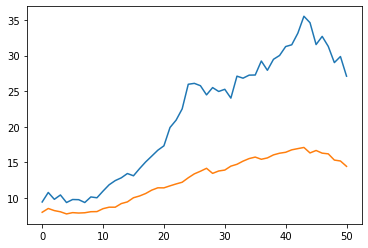

In [29]:
plt.plot(ws)
plt.plot(wsn)
plt.show()

In [30]:
df = pd.DataFrame(data=ws, columns=["w10mean"])

In [31]:
df.to_csv(p1+'time_series/2020_w10mn_nio_amphan.csv')